# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

# Import ARWU data set

In [2]:
#Path 
path = r'C:\Users\ctede\OneDrive\Desktop\World University Rankings Analysis'

In [3]:
#Data set 
ARWU = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'ARWU_rename_countries.pkl'))

# Cleaning data

In [4]:
#Create a subset of variables of interest: pcp, ns, hici, and alumni
columns = ["pcp","ns","hici","alumni"]

In [5]:
#subset 
ARWU_sub = ARWU[columns]

In [6]:
ARWU_sub.head()

,pcp,ns,hici,alumni
0,72.4,100.0,100.0,100.0
1,73.6,100.0,100.0,100.0
2,73.0,100.0,100.0,100.0
3,74.1,100.0,100.0,100.0
4,74.8,100.0,100.0,100.0


In [7]:
#check for missing values 
ARWU_sub.isnull().sum()

pcp        1
ns        12
hici       1
alumni     0
dtype: int64

### Instead of imputing the median for the missing values, remove the nulls from the ns variable

In [8]:
#drop missing values
ARWU_clean = ARWU_sub[ARWU_sub['ns'].isnull()==False]
ARWU_clean

,pcp,ns,hici,alumni
0,72.4,100.0,100.0,100.0
1,73.6,100.0,100.0,100.0
2,73.0,100.0,100.0,100.0
3,74.1,100.0,100.0,100.0
4,74.8,100.0,100.0,100.0
...,...,...,...,...
3009,32.2,0.0,0.0,0.0
3010,18.5,3.3,0.0,0.0
3011,15.3,0.0,3.6,15.4
3012,17.5,4.2,7.2,0.0


In [9]:
#Look for missing values 
ARWU_clean.isnull().sum()

pcp       0
ns        0
hici      0
alumni    0
dtype: int64

In [11]:
#Check for duplicates
dups = ARWU_clean.duplicated()
dups.shape

(3002,)

C:\apps\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pcp', ylabel='Density'>

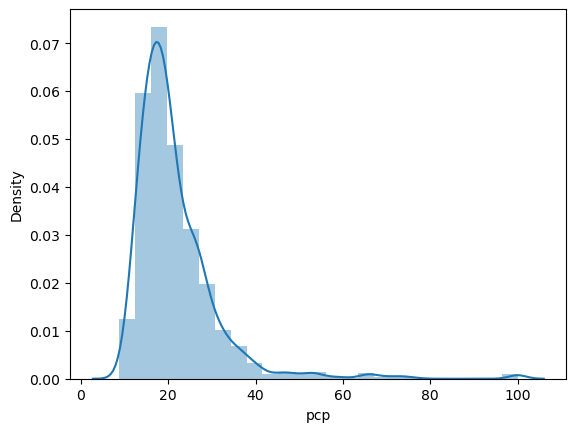

In [12]:
#Extreme values 
sns.distplot(ARWU_clean['pcp'],bins=25)

C:\apps\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ns', ylabel='Density'>

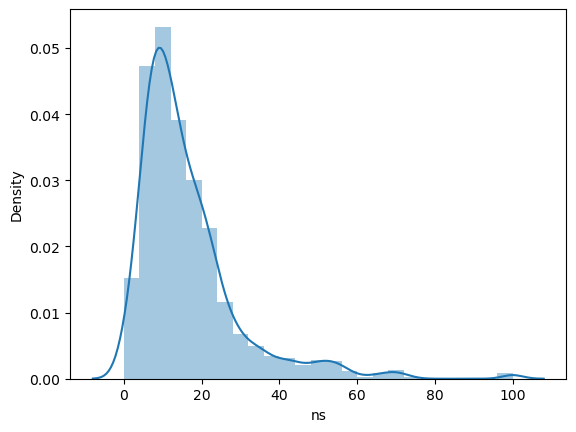

In [13]:
#Extreme values 
sns.distplot(ARWU_clean['ns'],bins=25)

# Prepare data for regression analysis 

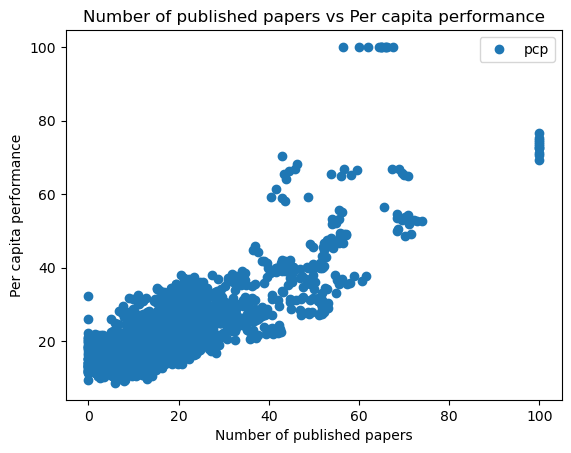

In [14]:
#Using matplotlib to create a sccatterplot for the pcp and ns variables 
ARWU_clean.plot(x='ns',y='pcp',style='o')
plt.title('Number of published papers vs Per capita performance')
plt.xlabel('Number of published papers')
plt.ylabel('Per capita performance')
plt.show()

In [15]:
#independent and dependent 
#Reshape the variables into NumPy arrays and place them into separate objects
#X = independent 
X = ARWU_clean['ns'].values.reshape(-1,1)

#y = dependent 
y = ARWU_clean['pcp'].values.reshape(-1,1)

In [16]:
#Split data 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# Regression analysis 

In [17]:
#Create a regression object 
regression = LinearRegression()

In [18]:
#Fit the model to the training set 
regression.fit(X_train, y_train)

LinearRegression()

In [19]:
#Create a prediction for y on the test set
y_predicted = regression.predict(X_test)

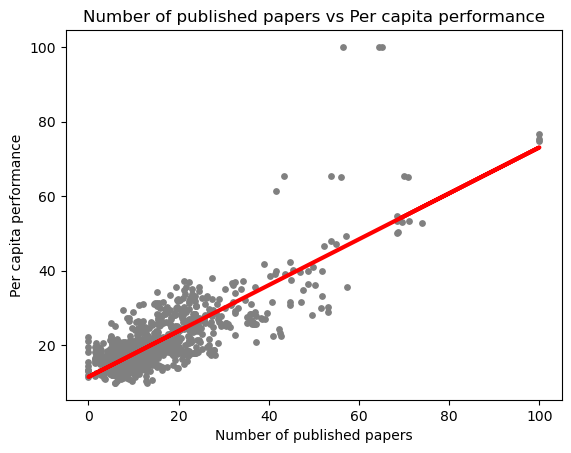

In [20]:
#Plot the regression 
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)
plot_test.title('Number of published papers vs Per capita performance')
plot_test.ylabel('Per capita performance')
plot_test.xlabel('Number of published papers')
plot_test.show()

In [21]:
#model performance stats
#Create objects for the model summary stats
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [22]:
#Print the model stats
print('Slope', regression.coef_)
print('Mean squared error', rmse)
print('R2 score', r2)

Slope [[0.61544958]]
Mean squared error 31.88464342029793
R2 score 0.6527417293506979


Removing the 12 missing values from the ns variable did not significantly affect the regression analysis and model statistics -- they  are very similar to the results where the median was imputed for the missing values for the ns variable. 